In [16]:
import os
import pickle
import matplotlib.pyplot as plt

PROBE_DIR = ""


skill_files = ["modified_16layer_skill_probe_sweep_results", "modified_8layer_skill_probe_sweep_results"]
piece_files = ["16layer_piece_probe_sweep_results", "8layer_piece_probe_sweep_results"]

test_data_dir = os.path.join(PROBE_DIR, 'test_data')


skill_file_layer_data = {}
piece_file_layer_data = {}

def get_layer_data(folder_name):
    file_dir = os.path.join(test_data_dir, folder_name)
    # Step 1: List all pickle files
    pickle_files = [f for f in os.listdir(file_dir) if f.endswith('.pkl')]
    # Step 2 and 3: Open each file and calculate average accuracy
    average_accuracies = {}
    for file in pickle_files:
        with open(os.path.join(file_dir, file), 'rb') as f:
            data = pickle.load(f)
            average_accuracy = sum(data["accuracy"]) / len(data["accuracy"])
            layer_num = int(file.split('.')[0].split('_')[-1])
            average_accuracies[layer_num] = float(average_accuracy)
    return average_accuracies

for skill_file in skill_files:
    skill_file_layer_data[skill_file] = get_layer_data(skill_file)
for piece_file in piece_files:
    piece_file_layer_data[piece_file] = get_layer_data(piece_file)

In [17]:
for skill_file in skill_file_layer_data:
    print(skill_file)
    # print the layer with the highest accuracy and its value
    max_layer = max(skill_file_layer_data[skill_file], key=skill_file_layer_data[skill_file].get)
    print(max_layer, skill_file_layer_data[skill_file][max_layer])

for piece_file in piece_file_layer_data:
    print(piece_file)
    # print the layer with the highest accuracy and its value
    max_layer = max(piece_file_layer_data[piece_file], key=piece_file_layer_data[piece_file].get)
    print(max_layer, piece_file_layer_data[piece_file][max_layer])

modified_16layer_skill_probe_sweep_results
15 0.9039837718009949
modified_8layer_skill_probe_sweep_results
7 0.8796192407608032
16layer_piece_probe_sweep_results
11 0.9880005717277527
8layer_piece_probe_sweep_results
5 0.9803881049156189


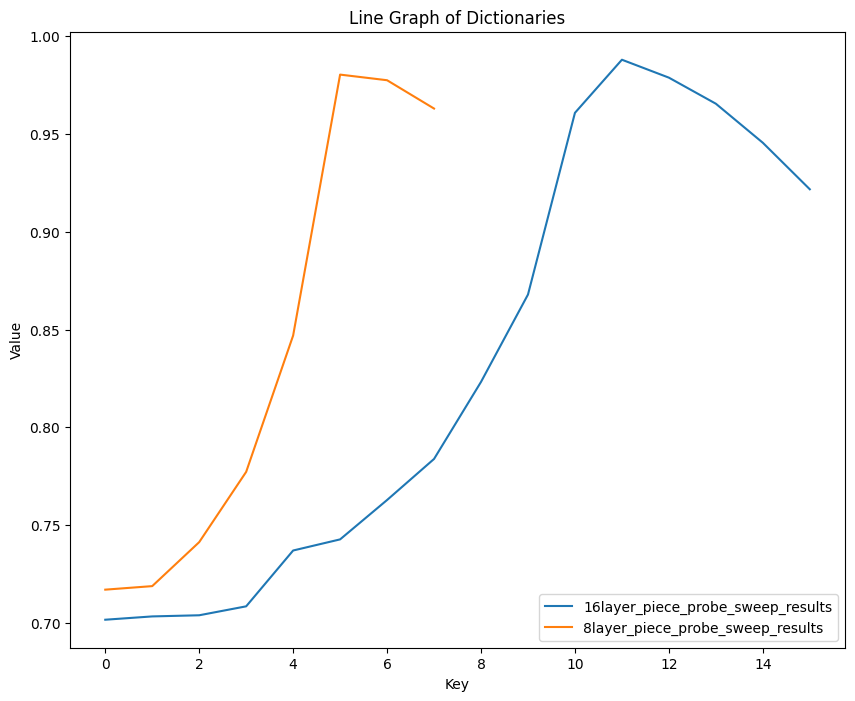

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

for piece_file, layer_data in piece_file_layer_data.items():
    # Ensure the keys are sorted if they're not numeric or already in desired order
    keys = sorted(layer_data.keys())
    values = [layer_data[key] for key in keys]

    plt.plot(keys, values, label=piece_file)  # Plot each line with label as piece_file

plt.xlabel('Key')  # Label for X-axis
plt.ylabel('Value')  # Label for Y-axis
plt.title('Line Graph of Dictionaries')  # Title of the graph
plt.legend()  # Show legend to identify lines
plt.show()

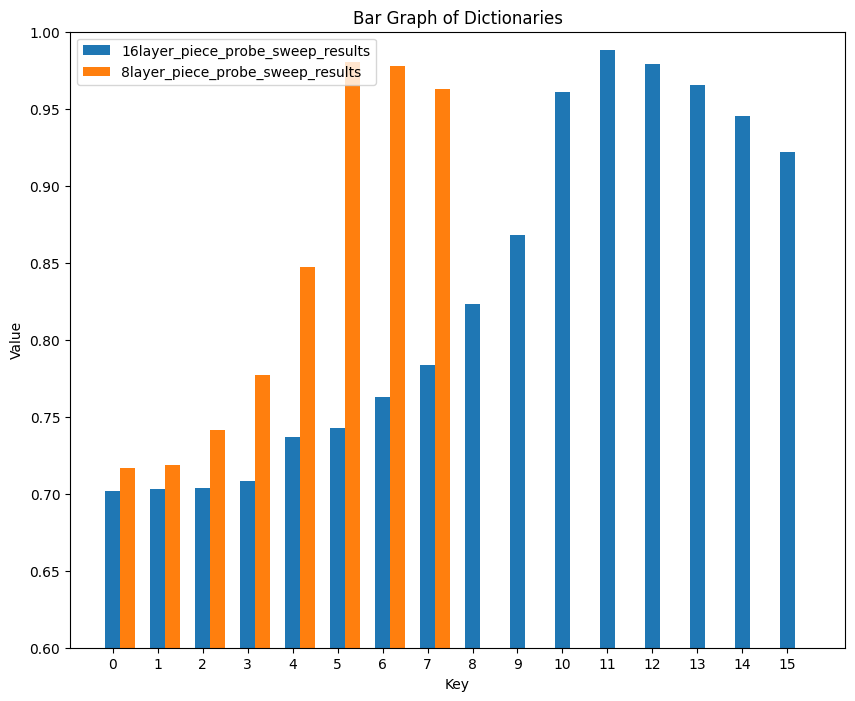

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Number of dictionaries
n = len(piece_file_layer_data)
# All unique keys sorted, assuming all sub-dicts have the same keys for simplicity
keys = sorted({key for d in piece_file_layer_data.values() for key in d})
# Total number of unique keys
total_keys = len(keys)
# Width of each bar
width = 1 / (n + 1)
# Creating a figure and axis
plt.figure(figsize=(10, 8))

# Enumerating over each piece_file and its corresponding dictionary
for i, (piece_file, layer_data) in enumerate(piece_file_layer_data.items(), start=1):
    # Calculating offsets for each bar to not overlap
    offsets = np.arange(len(keys)) + width * i
    # Getting values in the order of sorted keys
    values = [layer_data.get(key, 0) for key in keys]  # Default to 0 if key not found

    # Plotting the bars with an offset
    plt.bar(offsets, values, width=width, label=piece_file)

    # Set min and max y limits
    plt.ylim(0.6, 1.0)

# Adjusting the x-ticks to be in the middle of the groups and setting the keys as labels
plt.xticks(np.arange(len(keys)) + width * n / 2, keys)
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('Bar Graph of Dictionaries')
plt.legend()
plt.show()

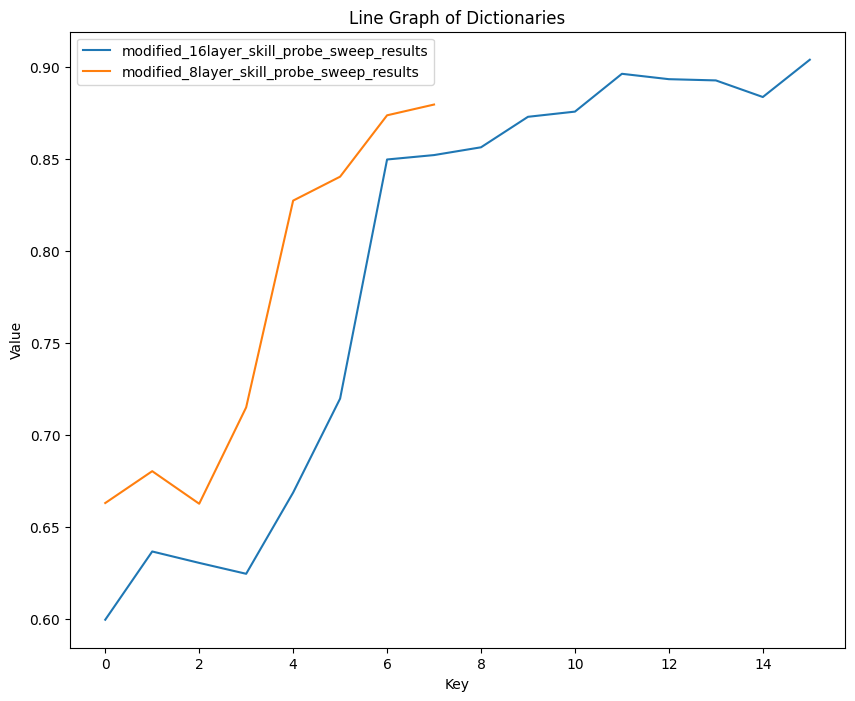

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

for skill_file, layer_data in skill_file_layer_data.items():
    # Ensure the keys are sorted if they're not numeric or already in desired order
    keys = sorted(layer_data.keys())
    values = [layer_data[key] for key in keys]

    plt.plot(keys, values, label=skill_file)

plt.xlabel('Key')  # Label for X-axis
plt.ylabel('Value')  # Label for Y-axis
plt.title('Line Graph of Dictionaries')  # Title of the graph
plt.legend()  # Show legend to identify lines
plt.show()

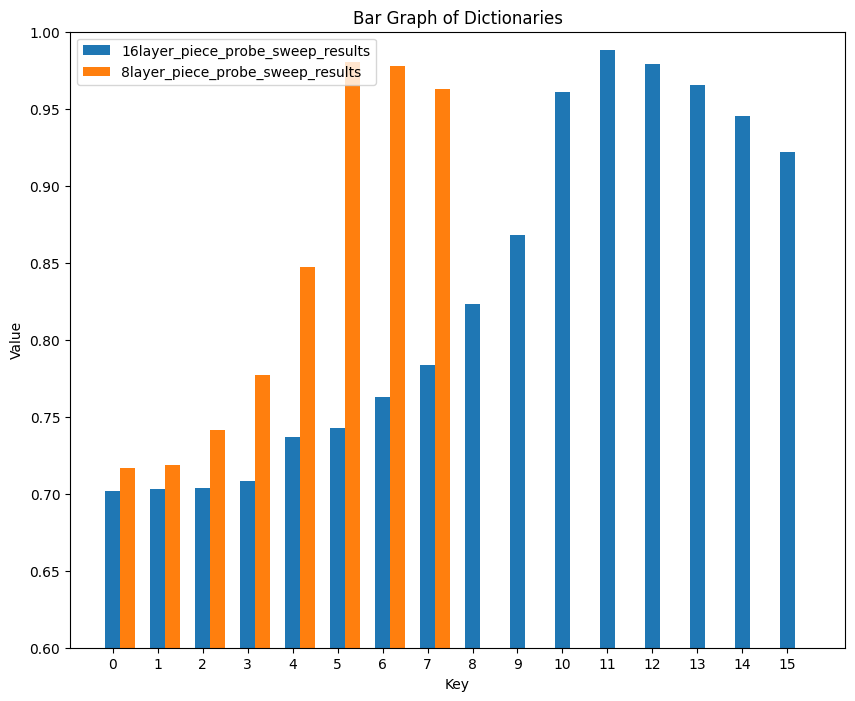

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Number of dictionaries
n = len(skill_file_layer_data)
# All unique keys sorted, assuming all sub-dicts have the same keys for simplicity
keys = sorted({key for d in skill_file_layer_data.values() for key in d})
# Total number of unique keys
total_keys = len(keys)
# Width of each bar
width = 1 / (n + 1)
# Creating a figure and axis
plt.figure(figsize=(10, 8))

# Enumerating over each skill_file and its corresponding dictionary
for i, (skill_file, layer_data) in enumerate(skill_file_layer_data.items(), start=1):
    # Calculating offsets for each bar to not overlap
    offsets = np.arange(len(keys)) + width * i
    # Getting values in the order of sorted keys
    values = [layer_data.get(key, 0) for key in keys]  # Default to 0 if key not found

    # Plotting the bars with an offset
    plt.bar(offsets, values, width=width, label=skill_file)

    # Set min and max y limits
    plt.ylim(0.6, 1.0)

# Adjusting the x-ticks to be in the middle of the groups and setting the keys as labels
plt.xticks(np.arange(len(keys)) + width * n / 2, keys)
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('Bar Graph of Dictionaries')
plt.legend()
plt.show()